## Understanding the problem

We have a time dynamical system whose state is described by two variables, $x$ and $v$.

The question asks how we can approximate these time dynamical systems using a regression tree when the data is in the form
$$
((x_k, v_k), (x_{k+1}, v_{k+1}))
$$

We could use a single tree to make predictions for the next state, but we would get more accurate results if we used multiple regression trees each with a limited height?

## Code for task 4

In [1]:
from task1 import *

# generating data
T = np.arange(0, 20)

# initial state
x_k = np.array([0.5, 1.5])

# creating an array of data
# shape: (number of time steps (rows), number of entries in each row, dimension of each column (previous state and next state))
X = np.zeros((T.size, 2, 2))

for t in T:
    X[t, 0, :] = x_k
    # creating next state
    X[t, 1, 0] = 0.9*x_k[0] - 0.2*x_k[1]
    X[t, 1, 1] = 0.2*x_k[0] + 0.9*x_k[1]
    x_k = X[t, 1, :]

y = X[:, 1]
X = X[:, 0]
X.shape

(20, 2)

In [2]:
print(y[0:2])
np.mean(y[0:2], axis=0)

[[ 0.15   1.45 ]
 [-0.155  1.335]]


array([-0.0025,  1.3925])

In [3]:
model = RegressionTree()
model.fit(X, y[:, 0])
model.decision_path(X[10])
print(y[10])

x[0] < -0.31973391403185003
x[1] >= -0.2033957386500002
x[0] < -0.5999500000000002
x[1] < 0.11778481499999988
x == -0.6714284655500002
[-0.56360647 -0.31734186]


/home/xavier/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/xavier/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/xavier/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


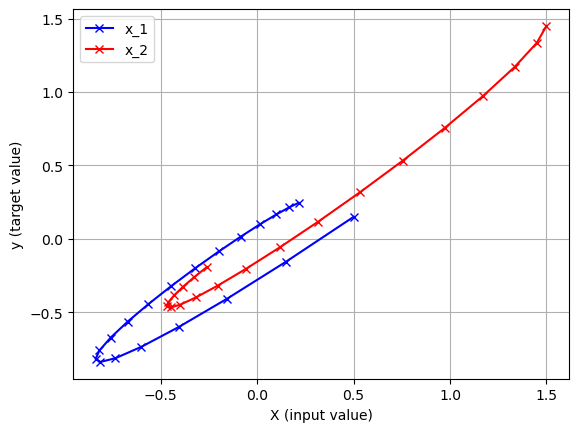

In [4]:
# plotting the correct outputs
import matplotlib.pyplot as plt

plt.plot(X[:, 0], y[:, 0], '-xb')
plt.plot(X[:, 1], y[:, 1], '-xr')
plt.xlabel('X (input value)')
plt.ylabel('y (target value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

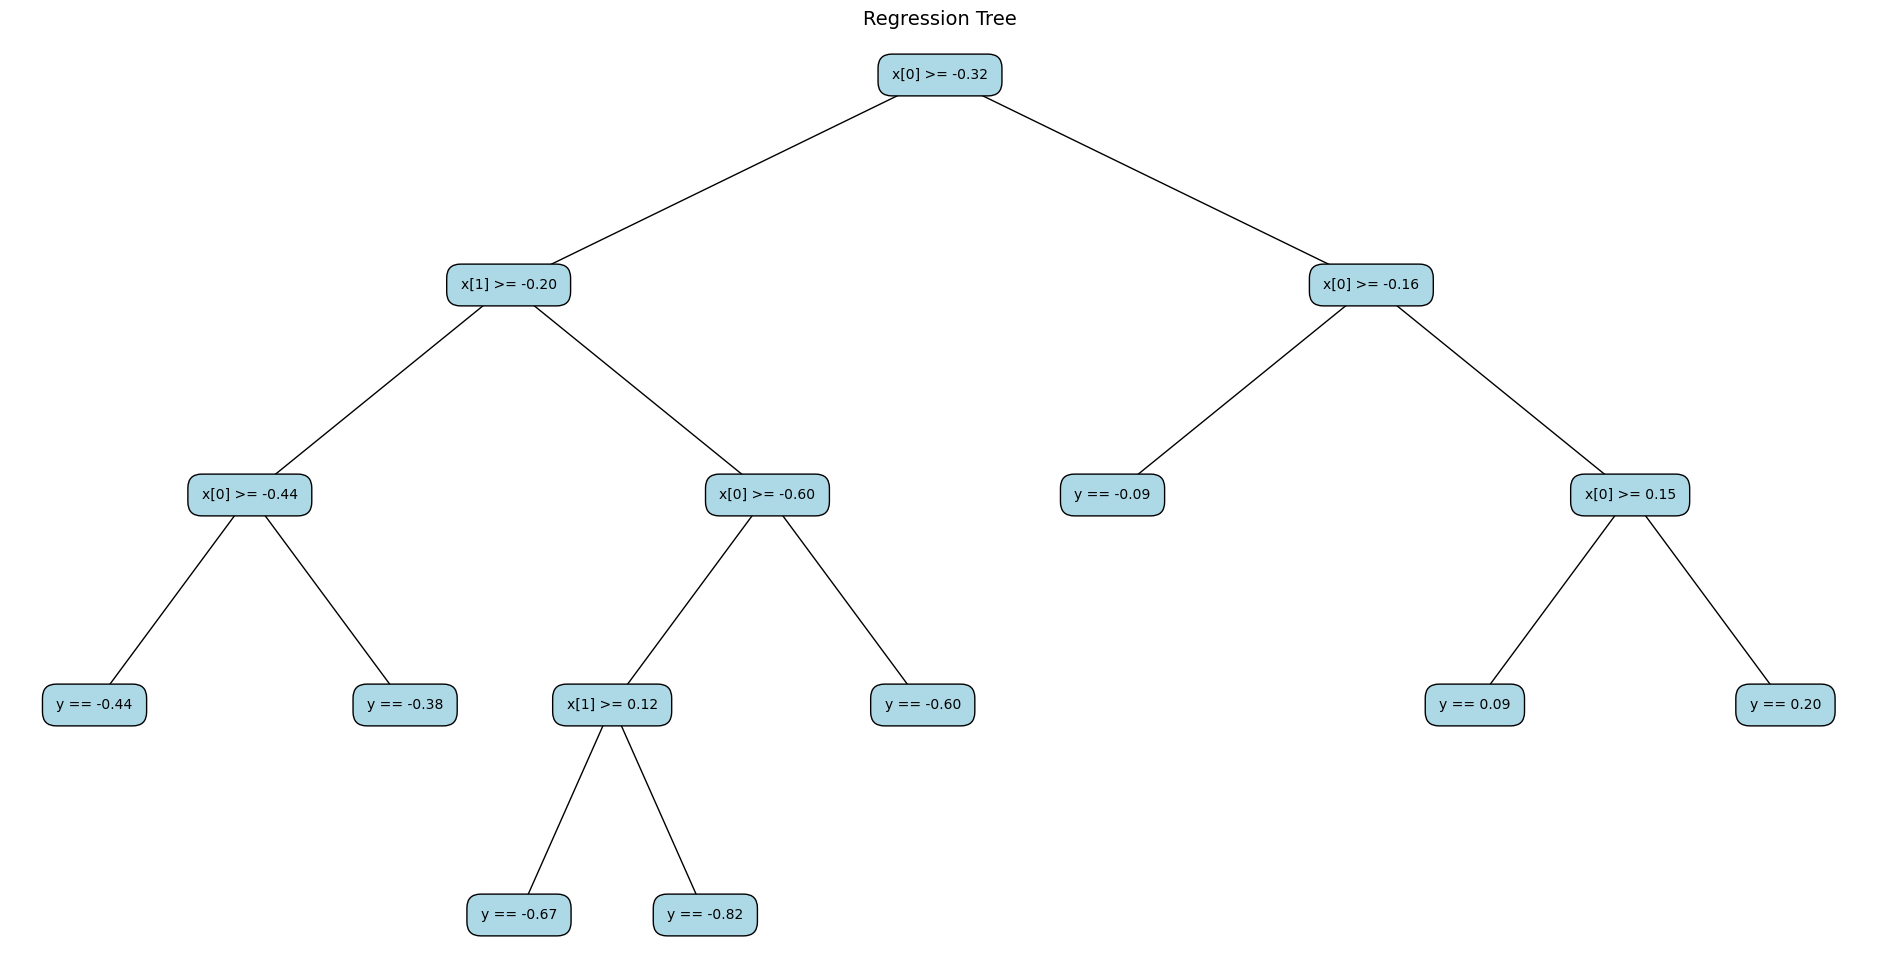

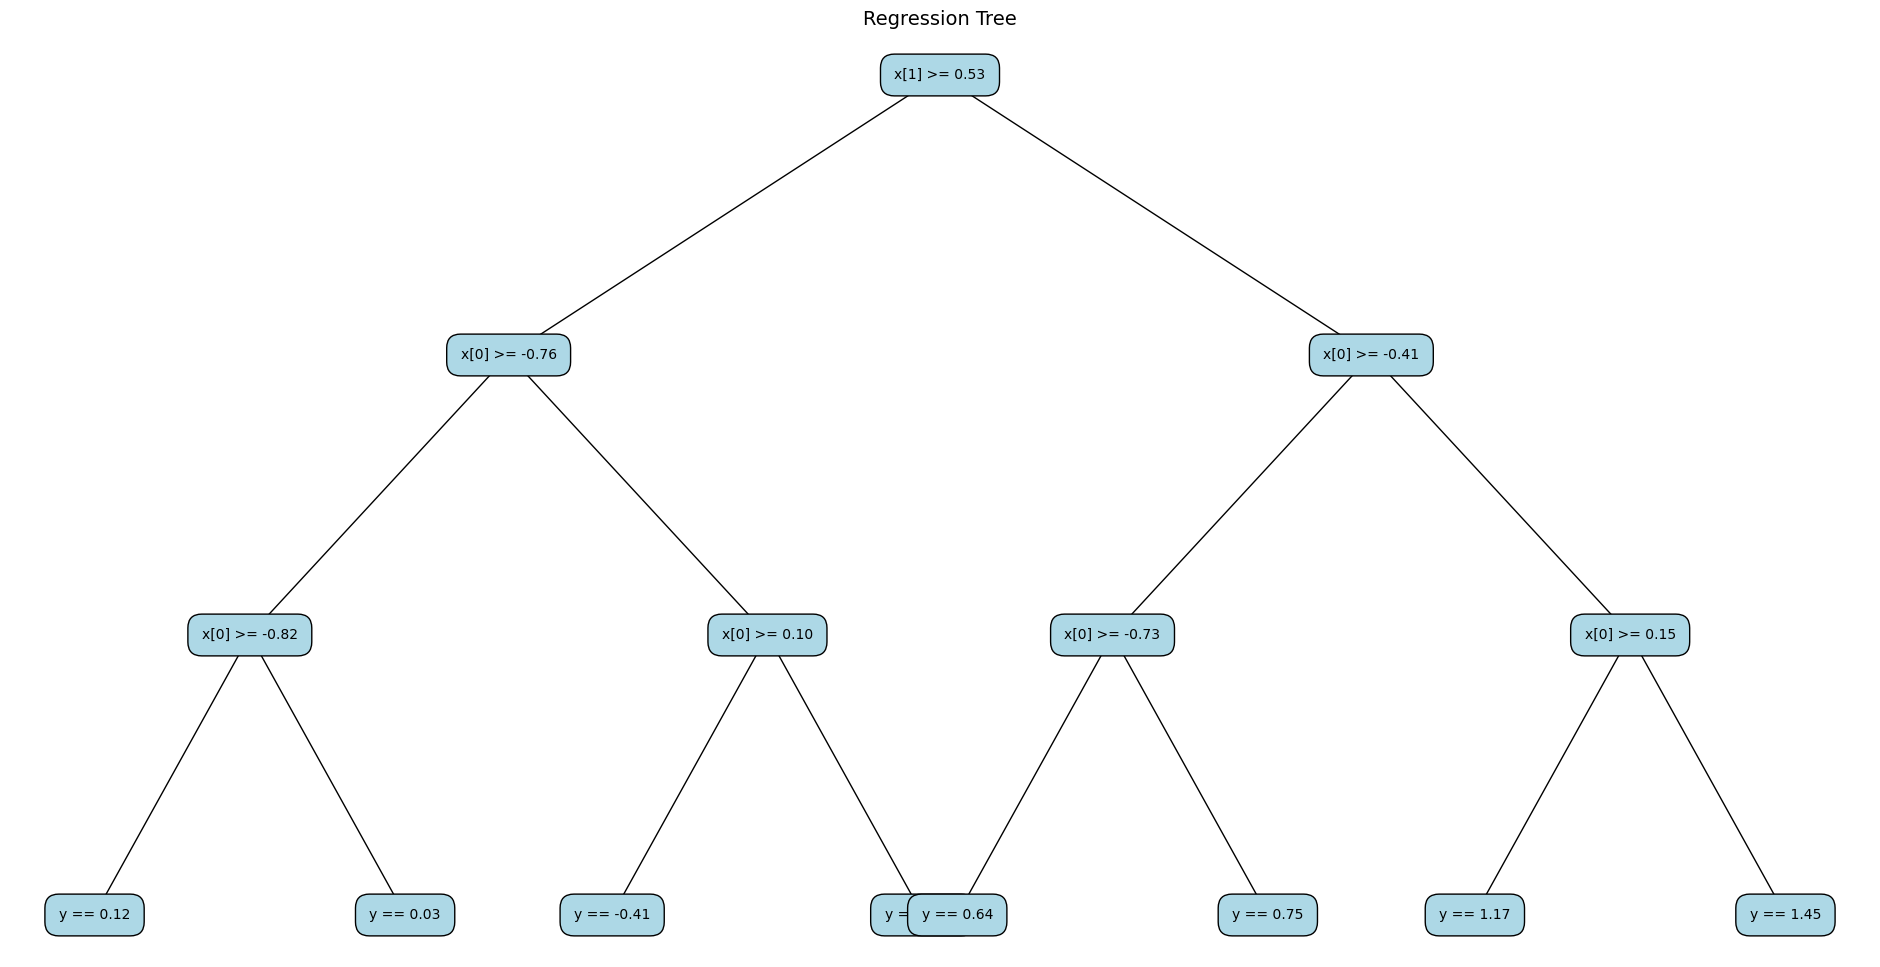

In [12]:
# training two different models for each dimension
model1 = RegressionTree(leaf_size=8)
model1.fit(X, y[:, 0])
model1.bst.plot_tree()

model2 = RegressionTree(max_height=3)
model2.fit(X, y[:, 1])
model2.bst.plot_tree()

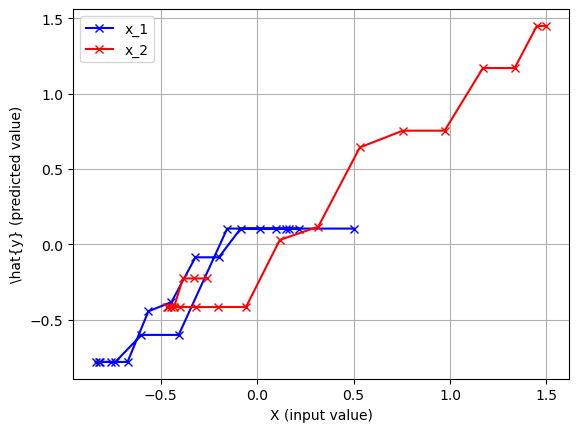

In [6]:
# plotting predictions vs. target values
predictions_x1 = []
predictions_x2 = []

for x in X:
    predictions_x1.append(model1.predict(x))
    predictions_x2.append(model2.predict(x))

plt.plot(X[:, 0], predictions_x1, '-xb')
plt.plot(X[:, 1], predictions_x2, '-xr')
plt.xlabel('X (input value)')
plt.ylabel('\\hat{y} (predicted value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

In [7]:
print(model1.predict(X[10]))
print(y[10, 0])

-0.7792638978100003
-0.5636064712650002
